In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from hypopt import GridSearch
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
data1 = sio.loadmat('data/svm1.mat')
x = data1['X']
y = data1['y']
print(x.shape)
print(y.shape)

(51, 2)
(51, 1)


In [3]:
#fit svm C=100
clf1 = svm.SVC(C=100.0,gamma='scale',kernel='linear')
clf1.fit(x,y.ravel())

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

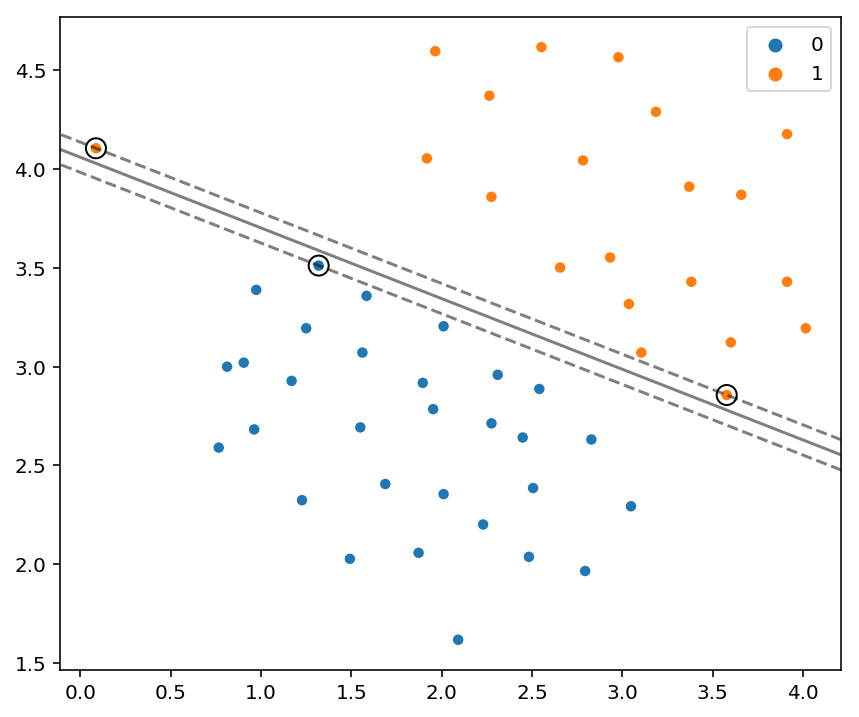

In [4]:
#visualize data
def visualize(clf,x,y):
    fig = plt.figure(figsize=(7,6))
    ax = sns.scatterplot(x=x[:,0],y=x[:,1],hue=y[:,0])
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

visualize(clf1,x,y)


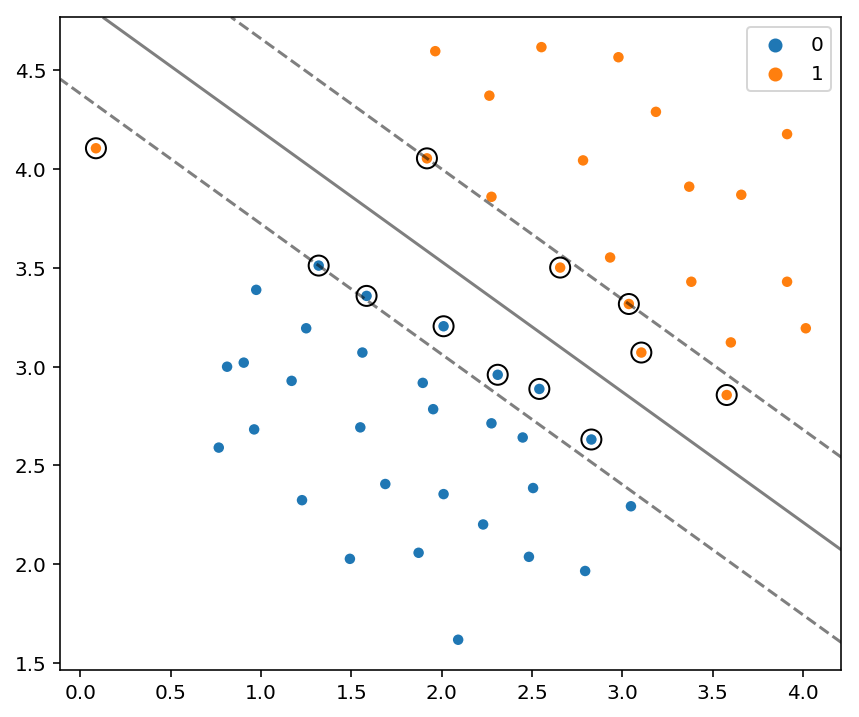

In [5]:
#fit svm C=1
clf2 = svm.SVC(C=1.0,gamma='scale',kernel='linear')
clf2.fit(x,y.ravel())
visualize(clf2,x,y)

In [6]:
data2 = sio.loadmat('data/svm2.mat')
x2 = data2['X']
y2 = data2['y']

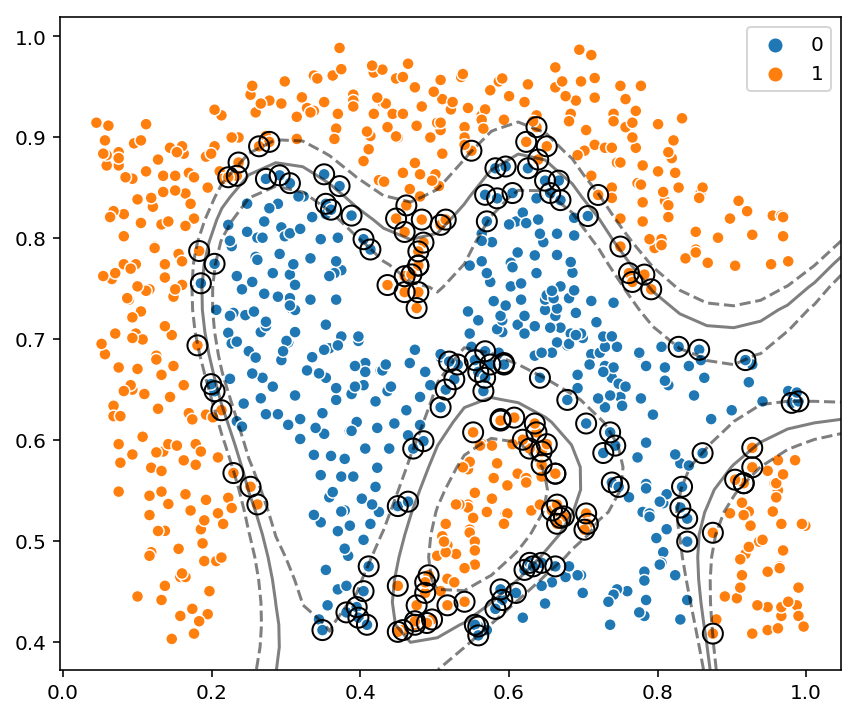

In [7]:
#fit svm C=1.0, Gaussian kernel
clf3 = svm.SVC(C=100.0,gamma='scale',kernel='rbf')
clf3.fit(x2,y2.ravel())
visualize(clf3,x2,y2)

In [8]:
data3 = sio.loadmat('data/svm3.mat')
x3train = data3['X']
y3train = data3['y']
x3val = data3['Xval']
y3val = data3['yval']

In [9]:
#search for optimal C and sigma
Cs = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
gammas = np.copy(Cs)
param_grid = {'C':Cs, 'gamma': gammas}
opt = GridSearch(model = svm.SVC(kernel='rbf'),param_grid = param_grid)
clf4 = opt.fit(x3train,y3train.ravel(),x3val,y3val.ravel())
opt.best_params

{'C': 3, 'gamma': 30.0}

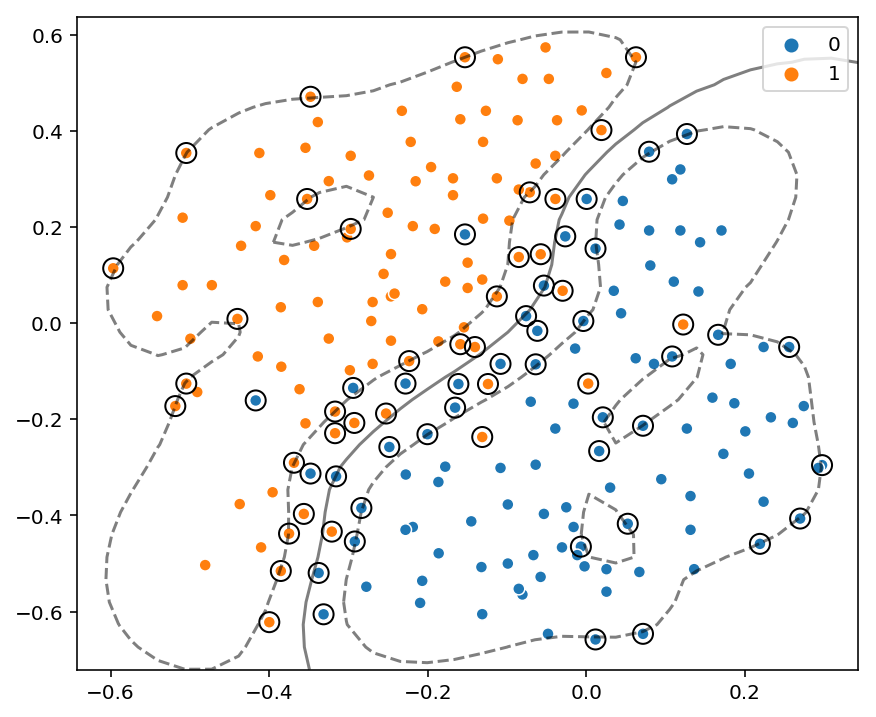

In [10]:
visualize(clf4,x3train,y3train)

### Spam Classifier

In [11]:
data4 = sio.loadmat('data/spamTrain.mat')
data5 = sio.loadmat('data/spamTest.mat')
xtrain = data4['X']
ytrain = data4['y']
xtest = data5['Xtest']
ytest = data5['ytest']

In [12]:
clf5 = svm.SVC(gamma='scale',C=1)
clf5.fit(xtrain,ytrain.ravel())

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
y_pred_train = clf5.predict(xtrain)

In [14]:
acc_train= np.mean(y_pred_train == ytrain.ravel())*100
print(acc_train)

99.325


In [15]:
y_pred_test = clf5.predict(xtest)

In [16]:
acc_test = np.mean(y_pred_test == ytest.ravel())*100
print(acc_test)

98.7
